In [2]:
import numpy as np
import pandas as pd
import os

# Load data
data = pd.read_csv('emails.csv')
train_data = data
train_label=train_data['Prediction']
# Calculate class probabilities
prob_spam = train_data['Prediction'].value_counts()[1] / train_data.shape[0]
prob_ham = train_data['Prediction'].value_counts()[0] / train_data.shape[0]


# Separate spam and ham data for probability calculations
spam_data = train_data[train_data['Prediction'] == 1]
ham_data = train_data[train_data['Prediction'] == 0]
spam_data.drop(columns=['Prediction','Email No.'])
ham_data.drop(columns=['Prediction','Email No.'])
vocab_size = len(train_data.columns)  # Assuming 'Prediction' and an ID column

# Initialize word counts with Laplace smoothing
alpha =1
word_counts_spam = np.ones(vocab_size) * alpha
word_counts_ham = np.ones(vocab_size) * alpha

# Calculate conditional probabilities
word_counts_spam = np.ones(vocab_size) * alpha  # Laplace smoothing
word_counts_ham = np.ones(vocab_size) * alpha  # Laplace smoothing
#add one more row in spam and ham data
#word_count_spam & ham as the new mail

spam_data=pd.concat([spam_data,pd.DataFrame([word_counts_spam],columns=spam_data.columns)])
ham_data=pd.concat([ham_data,pd.DataFrame([word_counts_ham],columns=ham_data.columns)])
ham_data=ham_data.reset_index(drop=True)
spam_data=spam_data.reset_index(drop=True)

  #p_words_spam.append((spam_data.iloc[:,i].sum())/(spam_data.sum()))
spam_data=spam_data.drop(columns=['Prediction','Email No.'])
ham_data=ham_data.drop(columns=['Prediction','Email No.'])
p_words_spam=((spam_data.sum())/(spam_data.values.sum()))
p_words_ham=((ham_data.sum())/(ham_data.values.sum()))
q_words_spam=1-p_words_spam
q_words_ham=1-p_words_ham
log_p_words_spam=np.log(p_words_spam)
log_p_words_ham=np.log(p_words_ham)
log_q_words_spam=np.log(q_words_spam)
log_q_words_ham=np.log(q_words_ham)
def test_concat(train_data,word_counts):
        # Convert `word_counts` dictionary to a DataFrame with the same columns as `test_data`
    word_counts_df = pd.DataFrame([word_counts], index=[0])  # Convert dict to single-row DataFrame
    # Align columns to avoid misalignment
    word_counts_df = word_counts_df.reindex(columns=train_data.columns, fill_value=0)
    concat_test_data=pd.concat([train_data,word_counts_df],ignore_index=True)
    
    concat_test_data.fillna(0,inplace=True)
    email_data=concat_test_data
    return word_counts_df
def predict_email(email_content, prob_spam, prob_ham, log_p_words_spam, log_p_words_ham, log_q_words_spam, log_q_words_ham):
    """
    Predicts if a single email is spam or ham.
    
    Args:
        email_content (str): Content of the email.
        
    Returns:
        int: +1 for spam, 0 for ham.
    """
    word_counts = word_count(split_words(email_content))
    p_spam = np.log(prob_spam)
    p_ham = np.log(prob_ham)
    email_data=test_concat(train_data,word_counts)
    for word, count in word_counts.items():
        # Check if the word exists in the vocabulary
        if word in log_p_words_spam.index:
            p_spam += count * log_p_words_spam[word]
            p_ham += count * log_p_words_ham[word]
        elif word in log_q_words_spam.index:
            # For words not present in the email, use log_q probabilities
            p_spam += count * log_q_words_spam[word]
            p_ham += count * log_q_words_ham[word]
        else:
            continue
    return 1 if p_spam > p_ham else 0


def split_words(text):
    """
    Processes text into clean, lowercase words, removing special characters.
    """
    text = text.lower()
    for ch in [",", ":", ";", "(", ")", "\"", ".", "\\", "/", "'", "\n"]:
        text = text.replace(ch, " ")
    return text.split()

def word_count(words):
    """
    Generates word count dictionary from list of words.
    """
    word_counts = {}
    for word in words:
        word_counts[word] = word_counts.get(word, 0) + 1
    return word_counts

def process_and_predict(folder_path):
    """
    Reads all text files from folder_path, predicts spam or ham, and returns predictions.
    """
    predictions = {}
    pred_value=[]
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"):
            with open(os.path.join(folder_path, filename), 'r',encoding='ISO-8859-1', errors='ignore') as file:
                email_content = file.read()
                prediction = predict_email(email_content, prob_spam, prob_ham, log_p_words_spam, log_p_words_ham, log_q_words_spam, log_q_words_ham)
                predictions[filename] = prediction
                pred_value.append(prediction)
    return predictions, pred_value

# Example usage
import os

# Set the folder path to the current directory
folder_path = os.path.join(os.getcwd(), 'test')  # Assuming the folder is named 'test'
predictions,pred_value = process_and_predict(folder_path)
print(predictions)

{'ham (1).txt': 0, 'ham (10).txt': 0, 'ham (100).txt': 1, 'ham (101).txt': 0, 'ham (102).txt': 0, 'ham (103).txt': 0, 'ham (104).txt': 1, 'ham (105).txt': 1, 'ham (106).txt': 0, 'ham (107).txt': 1, 'ham (108).txt': 1, 'ham (109).txt': 0, 'ham (11).txt': 0, 'ham (110).txt': 0, 'ham (111).txt': 0, 'ham (112).txt': 0, 'ham (113).txt': 0, 'ham (114).txt': 0, 'ham (115).txt': 0, 'ham (116).txt': 0, 'ham (117).txt': 0, 'ham (118).txt': 0, 'ham (119).txt': 0, 'ham (12).txt': 0, 'ham (120).txt': 0, 'ham (121).txt': 0, 'ham (122).txt': 0, 'ham (123).txt': 0, 'ham (124).txt': 0, 'ham (125).txt': 0, 'ham (126).txt': 0, 'ham (127).txt': 0, 'ham (128).txt': 0, 'ham (129).txt': 0, 'ham (13).txt': 0, 'ham (130).txt': 0, 'ham (131).txt': 0, 'ham (132).txt': 0, 'ham (133).txt': 0, 'ham (134).txt': 0, 'ham (135).txt': 0, 'ham (136).txt': 0, 'ham (137).txt': 0, 'ham (138).txt': 0, 'ham (139).txt': 0, 'ham (14).txt': 0, 'ham (140).txt': 0, 'ham (141).txt': 0, 'ham (142).txt': 0, 'ham (143).txt': 0, 'ham (

In [3]:
test_email_spam=np.ones(250)
test_email_ham=np.zeros(250)
test_email_labels=np.concatenate((test_email_ham,test_email_spam,))

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

[[240  10]
 [  1 249]]
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98       250
         1.0       0.96      1.00      0.98       250

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500



Text(95.72222222222221, 0.5, 'Truth')

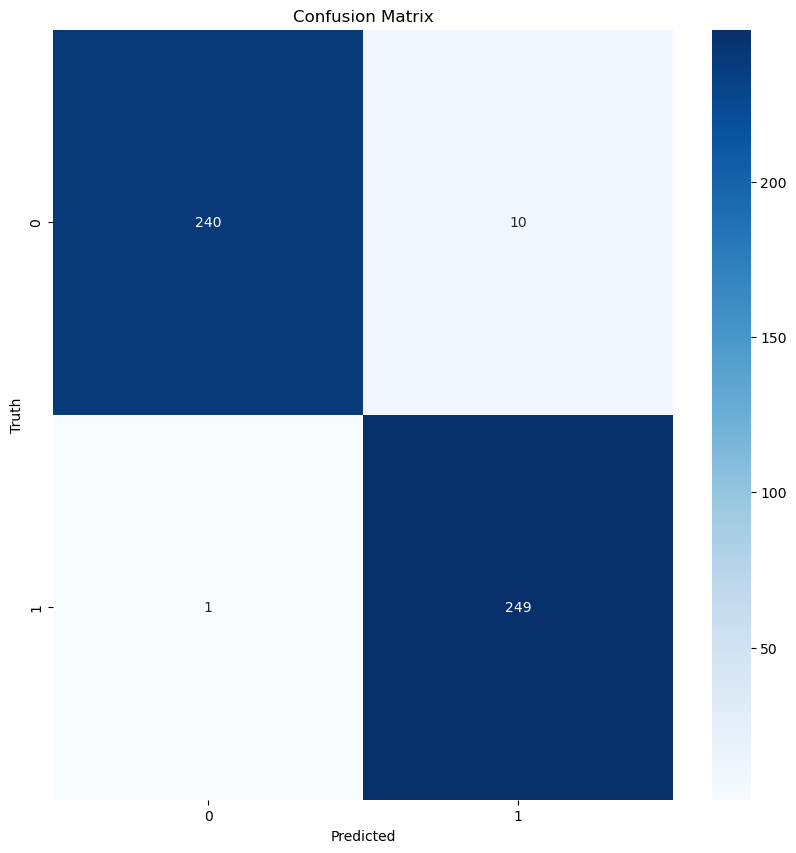

In [5]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(test_email_labels,pred_value))
print(classification_report(test_email_labels,pred_value))
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(test_email_labels,pred_value),annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')